In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

---

# Wave Deconvolution - Multiplication and Addition

* So a complex wave is made of simple waves.
* How can you break a complex wave into it's simple component waves?

### Answer: Multiplying a wave by another wave of frequency 100Hz cancels out all of the other component waves and leaves only the 100Hz component (kind of).

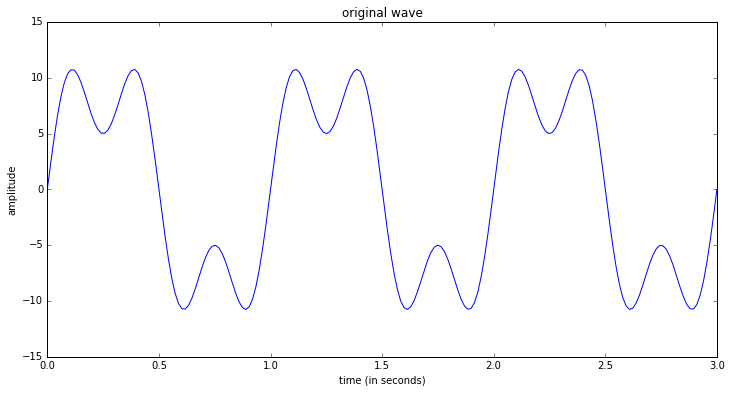

In [32]:
t = np.linspace(0, 3, 200)
freq_1hz_amp_10 = 10 * np.sin(1 * 2*np.pi*t)
freq_3hz_amp_5 =   5 * np.sin(3 * 2*np.pi*t)
complex_wave = freq_1hz_amp_10 + freq_3hz_amp_5

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='original wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave)

# Multiply complex wave by 1Hz wave

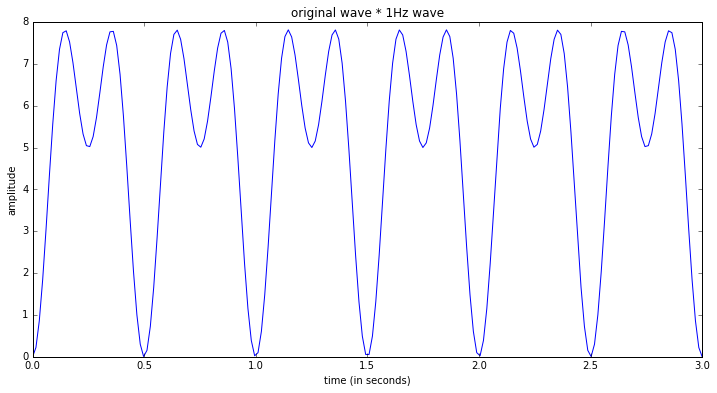

In [33]:
freq_1hz = np.sin(1 * 2*np.pi*t)
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='original wave * 1Hz wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave * freq_1hz)

In [34]:
sum(complex_wave*freq_1hz)

994.99999999999977

In [35]:
print("Amplitude of 1hz component: ", sum(complex_wave*freq_1hz) * 2.0 * 1.0/len(complex_wave))

Amplitude of 1hz component:  9.95


# Multiply complex wave by 3Hz wave

Notice that more of the graph is above the x-axis then below it.

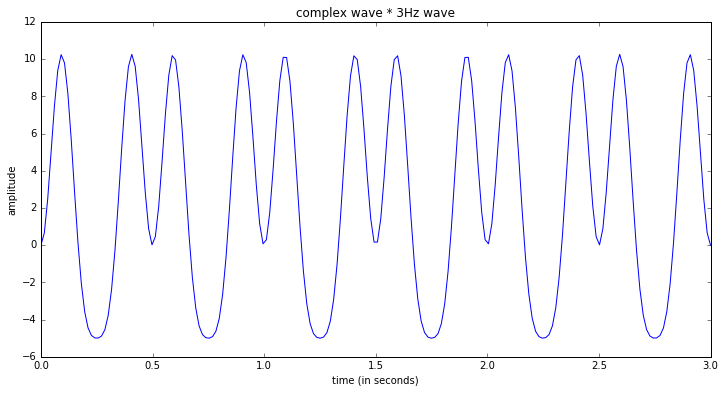

In [36]:
freq_3hz = np.sin(3 * 2*np.pi*t)
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='complex wave * 3Hz wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave * freq_3hz)

In [37]:
sum(complex_wave*freq_3hz)

497.5

In [38]:
print("Amplitude of 3hz component: ", sum(complex_wave*freq_3hz) * 2.0/len(complex_wave))

Amplitude of 3hz component:  4.975


# Multiply complex wave by 2Hz wave

Notice that an equal amount of the graph is above the x-axis as below it.

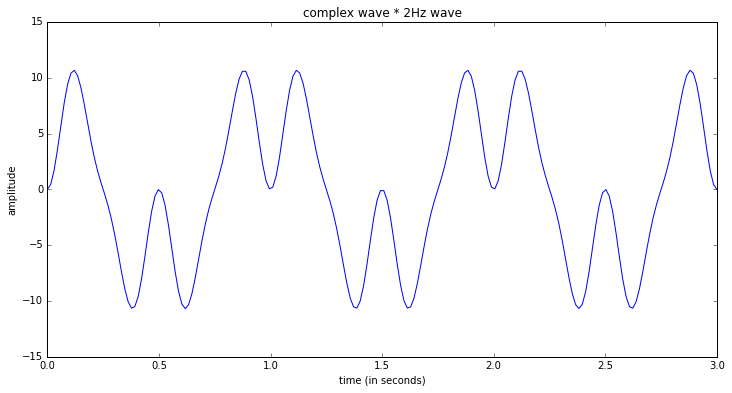

In [39]:
freq_2hz = np.sin(2 * 2*np.pi*t) 
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='complex wave * 2Hz wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave * freq_2hz)

In [40]:
sum(complex_wave*freq_2hz)

1.4549472737712679e-13

In [41]:
# Very close to 0
print("Amplitude of 3hz component: ", sum(complex_wave*freq_2hz) * 2.0/len(complex_wave))

Amplitude of 3hz component:  1.45494727377e-15


In [42]:
# Same with 4Hz - close to 0
freq_4hz = np.sin(4 * 2*np.pi*t) 
sum(complex_wave*freq_4hz)

-5.0848214527832113e-14

# So how does this work?

The summation of complex wave multiplied by simple wave of a given frequency leaves us with the "power" of that simple wave.